# Data Structures: Dataclasses
*VSCE Testbook*

## Dataclass
We have learned about 5 primitive types:

- Boolean
- Integer
- Float
- String
- None

We can use these to represent many kinds of data, but they have a limitation since they are so simple and cannot be combined with each other. To increase our capabilities, we will learn about a new category of types, which is *Composite types*. Composite types are named because they are composed of other types, unlike primitive types.

Dataclass: A way to make new types that collect multiple values together in one place.

### An example dataclass
First, we must import a decorator from the built-in `dataclasses` module (one of the many built-in libraries that Python conveniently provides for us.) Then we create a definition for the dataclass by writing the header and body of the dataclass.

The header requires:

- The decorator
- The class keyword
- The name of the new dataclass
- A colon

The body requires that we specify the fields, each on their own line.

In [11]:
# Required import
from dataclasses import dataclass   # Import the dataclass decorator to simplify class creation for data storage

# Definition
@dataclass                     # This `decorator` automatically generates __init__(for initialization), __repr__(for readable representation), and other methods
class Box:
    width: int                 # Attribute to store the width of the box, type-hinted as an integer # `Field` for the width of the box
    length: int                # Attribute to store the length of the box, type-hinted as an integer  # `Field` for the length of the box

Once defined, we can create instances of the dataclass using the `constructor function`, which has the same name as the defined dataclass.

The similarity between defining a function and defining a dataclass is very strong. The similarity between calling a function and instantiating ("creating an instance of") a dataclass is even stronger.

In [12]:
# Instance creation
my_box = Box(5, 10)           # Box() is the `constructor function` for the Box class

# Using the instance
print(my_box)

Box(width=5, length=10)


In [ ]:
# you cannot try to access the fields of the Box dataclass, only the instance
Box.width

AttributeError: type object 'Box' has no attribute 'width'

In [13]:
my_box.width

50

**Why you cannot try to access the fields of the Box dataclass, only the instance?**
- Dataclass: The pattern that is used as a base for instances
- Instance: A specific, concrete example of a class
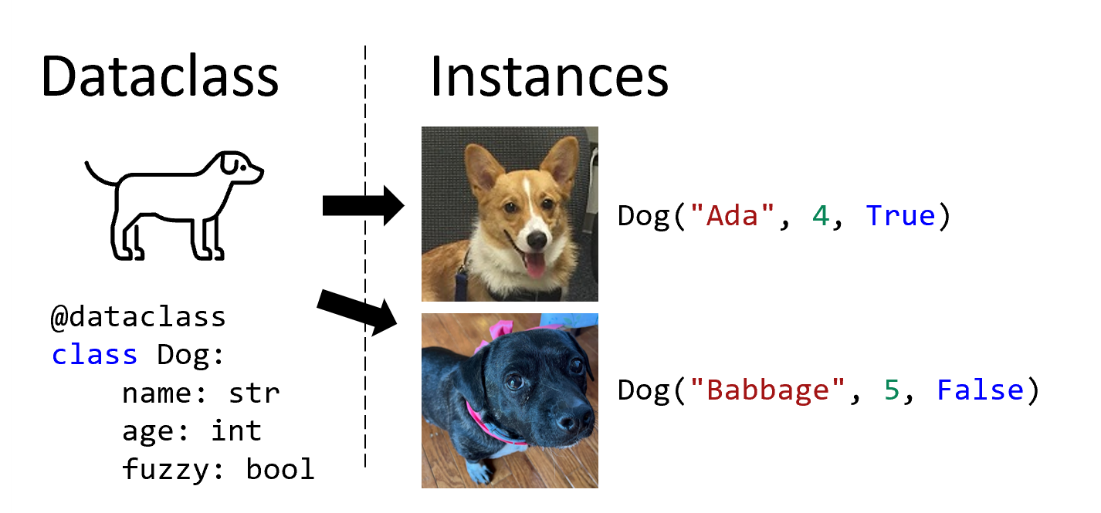

**Why we use `@dataclass` other than using list and dictionary?**
- **Lists**: Lists are ordered collections of items without intrinsic meaning for each element. If you use a list to represent an object like a `Box`, the meaning of `width` and `length` would be purely positional, which is less readable and can lead to errors if items are accessed incorrectly.

- **Dictionaries**: While dictionaries allow named keys, they do not enforce structure or types. They are more flexible but can lead to errors if keys or expected values are missing or incorrectly typed.

## Dataclass Operations


In [4]:
# Import the dataclass decorator from the dataclasses module
from dataclasses import dataclass

# Define a Rectangle class and use the @dataclass decorator to handle data storage functions
@dataclass
class Rectangle:
    length: int  # Define a field `length` for the Rectangle, type-hinted as an integer
    width: int   # Define a field `width` for the Rectangle, type-hinted as an integer

# Create an instance of the Rectangle class with specific values for length and width
box = Rectangle(5, 3)  # `Rectangle(5, 3)` calls the constructor function created by the dataclass

# Access the instance's fields and perform a calculation (area of the rectangle)
print("The box area is", box.length * box.width)
# This line prints the area of the rectangle using `box.length` and `box.width`,
# which are instance fields automatically generated by the @dataclass decorator


The box area is 15


Explanation of Dataclass Operations:

- **`@dataclass` Decorator**: By using `@dataclass`, the `Rectangle` class automatically gains a constructor (`__init__`), which initializes the fields `length` and `width` for each new instance.

- **Instance Creation** (`Rectangle(5, 3)`):
  - When we call `Rectangle(5, 3)`, the dataclass automatically calls the generated `__init__` method, creating an instance (`box`) with `length` set to `5` and `width` set to `3`.

- **Field Access** (`box.length`, `box.width`):
  - The `@dataclass` decorator allows us to directly access the fields (attributes) of `box`. This line calculates the area by multiplying `length` and `width` of the instance.

In summary, using `@dataclass` simplifies class creation by automatically handling basic methods and allowing easy access to defined fields.

## Functions Returning Dataclasses



**What Does "Functions Returning Dataclasses" Mean?**

When we say that a function "returns a dataclass," we mean that the function’s return value is an instance of a dataclass type. In this case, `parse_card` returns an instance of `Card`, a dataclass with two fields: `suit` and `rank`.

Instead of returning a simple data type (like an integer or string) or a complex type (like a list or dictionary), it returns a structured object with specific fields.

``` python
card_instance = parse_card("H2")
# This line means parse_card() returned a Card object with the attributes 'suit' set to "H" and 'rank' set to 2.
```

The result, `card_instance`, is an object with accessible fields—`card_instance.suit` and `card_instance.rank`—which contain the structured data.

In [7]:
pip install bakery

In [19]:
# Import the dataclass decorator to easily create a class with fields and automatically generated methods
from dataclasses import dataclass

# Import the assert_equal function from a custom bakery module to compare expected and actual results in tests
from bakery import assert_equal

# Define a Card class using @dataclass, which will automatically create an initializer and other methods
@dataclass
class Card:
    suit: str  # Field to store the suit of the card, expected to be a string (e.g., "H" for hearts)
    rank: int  # Field to store the rank of the card, expected to be an integer (e.g., 2 for the rank of two)

# Create an instance of Card directly
card_instance = Card("H", 2)
print(card_instance)

try:
    card_instance2 = Card("H2")
    print(card_instance2)
except TypeError as e:
    print(f"Error creating card instance directly: {e}")


# Define a function to parse a string and return a Card instance
def parse_card(card: str) -> Card:
    # Create a Card instance by using the first character as the suit and converting the rest to an integer rank
    return Card(card[0], int(card[1:]))
# Given an input string "H2" for example, here’s what each part would evaluate to:
  #card[0]: "H" (the suit)
  #card[1:]: "2" (the rank as a string)

# Use the parse_card function to create a Card instance from a string
parsed_card_instance = parse_card("H2")
print(parsed_card_instance)


# Test the parse_card function to ensure it correctly returns a Card with suit "H" and rank 2
assert_equal(parse_card("H2"), Card("H", 2))

# Test the parse_card function with another input to check it correctly returns a Card with suit "D" and rank 5
assert_equal(parse_card("D5"), Card("D", 5))


Card(suit='H', rank=2)
Error creating card instance directly: Card.__init__() missing 1 required positional argument: 'rank'
Card(suit='H', rank=2)
TEST PASSED - [line 34] assert_equal(parse_card("H2"), Card("H", 2))
TEST PASSED - [line 37] assert_equal(parse_card("D5"), Card("D", 5))


True

Explanation of Each Part:

- **`@dataclass` Usage**: The `Card` class is defined with `@dataclass`, so Python will automatically generate an `__init__` method that takes `suit` and `rank` as parameters, simplifying initialization and representation of `Card` objects.
  
- **`parse_card` Function**: This function creates and returns a `Card` object from a string format (e.g., `"H2"`). It takes the first character as the suit (`card[0]`) and the remaining characters as the rank (converted to an integer using `int(card[1:])`).

- **`assert_equal` for Testing**: These lines use `assert_equal` to compare the actual output of `parse_card` with the expected `Card` object, ensuring that `parse_card` works as intended.